<a href="https://colab.research.google.com/github/andoanminhkhanh/trituenhantao/blob/main/%C3%81nh_Test_CNN_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from imutils import paths

In [3]:
from imutils import paths

imgTest = list(paths.list_images("/content/drive/MyDrive/AI_ANH/test"))

In [4]:
X_test = []
y_test = []

In [5]:
for path_test in imgTest:
    Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
    img1 = cv2.imread(path_test, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh ở định dạng xám

    if img1 is None:
        print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
        continue

    img1 = cv2.resize(img1, (150, 150))  # Resize ảnh xám

    # Thêm vào dữ liệu data và label
    X_test.append(img1)
    y_test.append(Y_test)

In [6]:
#for path_test in imgTest:
  #  Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
   # img1 = cv2.imread(path_test)

    #if img1 is None:
     #   print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
      #  continue

   # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    #img1 = cv2.resize(img1, (150, 150))
   # img1 = np.expand_dims(img1, axis=-1)

    # Them vao du lieu data va label
   # X_test.append(img1)
    #y_test.append(Y_test)

In [7]:
lb = LabelBinarizer()
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
X_test = X_test.astype('float32') / 255

In [8]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/AI_ANH/CNN_GRAY.h5')

In [9]:
y_pred = loaded_model.predict(X_test)

17/17 [==============================] - 4s 201ms/step


In [10]:
y_pred

array([[9.9975801e-01, 2.4192124e-04],
       [9.9999756e-01, 2.4381961e-06],
       [9.9999994e-01, 8.5671168e-09],
       ...,
       [4.7301537e-06, 9.9999517e-01],
       [4.4320498e-02, 9.5567942e-01],
       [1.3735934e-01, 8.6264074e-01]], dtype=float32)

In [11]:
max_indices = np.argmax(y_pred, axis=1)

In [12]:
y_pred_new = np.zeros_like(max_indices)
y_pred_new[max_indices == 1] = 1
y_pred_new[max_indices == 2] = 2

In [13]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [14]:
y_test_new = np.array(y_test).reshape(-1)

# In kết quả
print(y_test_new)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

##**KIỂM THỬ HÌNH ẢNH CỤ THỂ**

In [15]:
labels = ['Bình thường', 'Viêm phổi']

In [16]:
import matplotlib.pyplot as plt

In [27]:
import cv2

# Đường dẫn tới tệp ảnh JPEG
img_path = '/content/drive/MyDrive/AI_ANH/person1_virus_13.jpeg'

# Đọc ảnh từ đường dẫn
img = cv2.imread(img_path)

# Kiểm tra xem ảnh có được đọc thành công không
if img is None:
    print(f"Không thể đọc được ảnh từ đường dẫn: {img_path}")
else:
    print(f"Đã đọc thành công ảnh từ đường dẫn: {img_path}")


Đã đọc thành công ảnh từ đường dẫn: /content/drive/MyDrive/AI_ANH/person1_virus_13.jpeg


1/1 [==============================] - 0s 88ms/step
[[0.9740165  0.02598351]]
- Bình thường:  97.4 %
- Viêm phổi:  2.6 %
--> Nhãn dự đoán:  Bình thường


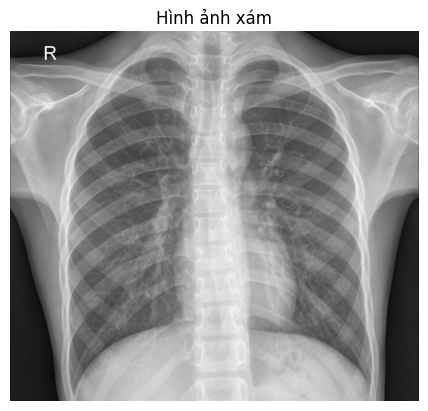

In [37]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread('/content/drive/MyDrive/AI_ANH/IM-0005-0001.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Đổi kích thước ảnh xám về 150x150
img_resize = cv2.resize(img_gray, (150, 150))

# Thêm một chiều để khớp với đầu vào của mô hình và chuẩn hóa giá trị pixel về khoảng [0, 1]
img_resize = img_resize / 255.0
img_resize = np.expand_dims(img_resize, axis=-1)  # Thêm chiều kênh
img_resize = np.expand_dims(img_resize, axis=0)  # Thêm chiều batch

# Tải mô hình đã huấn luyện (thay 'loaded_model' bằng tên mô hình của bạn)
model_path = "/content/drive/MyDrive/AI_ANH/CNN_GRAY.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Dự đoán
yhat = loaded_model.predict(img_resize)
max_index = np.argmax(yhat)
labels = ['Bình thường', 'Viêm phổi']  # Đảm bảo rằng các nhãn được định nghĩa trước

# In kết quả
print(yhat)
print('- Bình thường: ', round(yhat[0][0]*100,2), "%")
print('- Viêm phổi: ', round(yhat[0][1]*100,2), "%")
print("--> Nhãn dự đoán: ", labels[max_index])

# Hiển thị hình ảnh xám
plt.imshow(img_gray, cmap='gray')
plt.title("Hình ảnh xám")
plt.axis('off')
plt.show()


In [36]:
#img = cv2.imread('/content/drive/MyDrive/AI_ANH/person1_virus_13.jpeg')
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img1 = cv2.imread(path_test, cv2.IMREAD_GRAYSCALE)

#img_resize = tf.image.resize(img, (150,150))
#yhat = loaded_model.predict(np.expand_dims(img_resize/255, 0))
#max_index = np.argmax(yhat)
#labels[max_index]
#print(yhat)
#print('- Bình thường: ', round(yhat[0][0]*100,2),"%")
#print('- Viêm phổi: ', round(yhat[0][1]*100,2),"%")
#print('- Khói: ', round(yhat[0][2]*100,2),"%")
#print("--> Nhãn dự đoán: ", labels[max_index])
#plt.imshow(img)

#print("Hình ảnh:")
#plt.axis('off')
#plt.show()

UnimplementedError: Graph execution error:

Detected at node sequential_1/conv2d_2/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-36-a54f8263e8a3>", line 6, in <cell line: 6>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_1/conv2d_2/Relu}}]] [Op:__inference_predict_function_985]

##**MA TRẬN NHẦM LẪN**

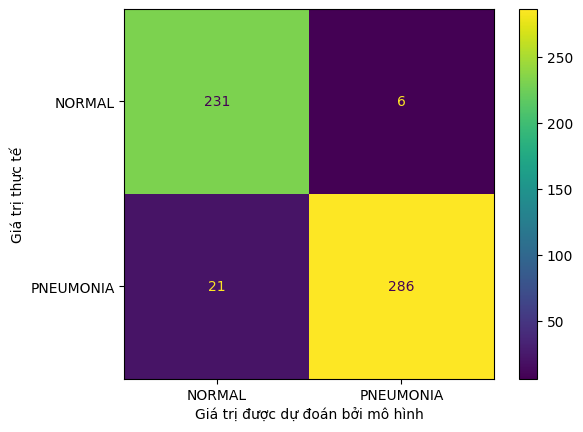

In [29]:
# Ma trận nhầm lẫn dạng đồ thị
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matran = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_new, y_pred_new), display_labels = ['NORMAL','PNEUMONIA'])
matran.plot()
plt.xlabel('Giá trị được dự đoán bởi mô hình')
plt.ylabel('Giá trị thực tế')
plt.show()

In [30]:
set(y_test_new)

{0, 1}

In [31]:
set(y_pred_new)

{0, 1}

In [32]:
max_indices1 = np.argmax(y_test, axis=1)
y_test_new = np.zeros_like(max_indices1)
y_test_new[max_indices1 == 1] = 1
y_test_new[max_indices1 == 2] = 2

In [33]:
y_test_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình: ",accuracy_score(y_test_new, y_pred_new) * 100, "%")

Độ chính xác của mô hình:  46.32352941176471 %


In [35]:
# Giả sử y_test và y_pred là các mảng chứa nhãn thực tế và dự đoán
# imgTest là danh sách các đường dẫn đến hình ảnh

for i in range(len(imgTest)):
    if y_test_new[i] == 1 and y_pred_new[i] == 1:
        print(f"Đường dẫn của hình ảnh thỏa mãn: {imgTest[i]}")